<a href="https://colab.research.google.com/github/yejin0455/sesac-python/blob/main/%ED%86%B5%EA%B3%84%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Convoultion 연산

원본 이미지와 커널(필터) 사이에 내적(dot) 연산을 순차적으로 이동하면서 특성 데이터를 만드는 연산

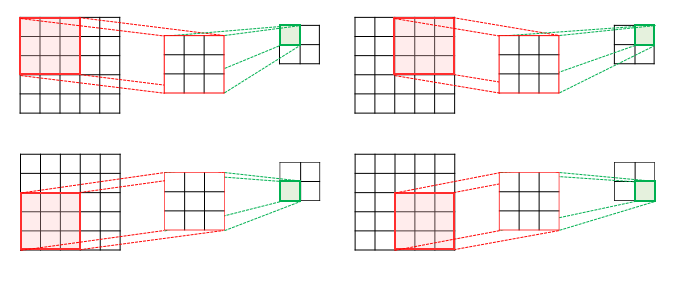

In [ ]:
import numpy as np
arr = np.arange(64)
darr = arr.reshape(8, -1)
darr

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55],
       [56, 57, 58, 59, 60, 61, 62, 63]])

In [ ]:
darr[:3, :3]  #원하는 부분을 추출하는 방법

array([[ 0,  1,  2],
       [ 8,  9, 10],
       [16, 17, 18]])

In [ ]:
kernel = np.array([[0, 1, 0], [1, 0, 0], [0, 0, 1]])
kernel

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]])

In [ ]:
feature = np.zeros((6, 6))
for i in range(6):
    for j in range(6):
        da = np.dot(darr[i:i+3, j:j+3], kernel)
        feature[i, j] = da.sum()
print(feature)

[[ 81.  90.  99. 108. 117. 126.]
 [153. 162. 171. 180. 189. 198.]
 [225. 234. 243. 252. 261. 270.]
 [297. 306. 315. 324. 333. 342.]
 [369. 378. 387. 396. 405. 414.]
 [441. 450. 459. 468. 477. 486.]]


In [ ]:
src = np.array([[0, 1, 2], [8, 9, 10], [16, 17, 18]])
print((np.dot(src, kernel)).sum())

81


# TF-IDF

언휴는 eh 도서관의 사서입니다.

고객이 많아지면서 언휴에게 책을 찾아달라는 요청도 많아졌어요.

이제 원하는 책을 찾는 것을 프로그램으로 제작해 보려고 합니다.

책을 찾을 때 원하는 질의를 입력하면 연관성이 높은지 점수를 부여할 거예요.

점수는 책 내에 질의가 나오는 빈도와 질의의 희귀도를 조합하에 계산합니다.

예를 들어 책 A에 전체 단어 수가 100개이고 질의가 3번 나오면 빈도 점수는 3/100입니다.

빈도 점수 = 질의 빈도/책에 단어 수

전체 책이 50권이고 질의를 포함하는 책이 6권이면 희귀도는 log2(50/(6+1))입니다.

희귀도 = log2((전체 책 수+1)/(질의 포함 책 수+1))

log2는 밑수가 2인 로그를 의미합니다.

책에 부여하는 연관성 점수는 희귀도 점수가 0일 때는 빈도 점수입니다.

*연관성 점수 = 빈도 점수 * : 희귀도 점수가 0일 때

희귀도 점수가 0이 아닐 때는 빈도 점수 X 희귀도 입니다.

연관성 점수 = 빈도 점수 X 희귀도 :희귀도 점수가 0이 아닐 때

입력은 책 내용 목록(문자열을 원소로 하는 리스트)와 검색 질의(문자열)이 주어집니다.

출력(반환)은 점수 목록입니다.

단어는 공백을 기준으로 구분합니다.

입력: ["abc korea bbc dde zzz","abc hello yahoo","korea python korea yahoo abc","hello korea","yahoo","hello","world"],"korea"

출력: [0.2, 0.0, 0.4, 0.5, 0.0, 0.0, 0.0]